## T2 - Análise de Sentimentos em Textos

Aluna: Fernanda Ferreira RA: 163676

Disciplina: IA369Y - Computação afetiva. 

Professor: Paula D. P. Costa

Data: 24/09/2018

### Introdução

Este trabalho foi baseado no problema 1, o qual busca identificar a valência de manchetes de jornais brasileiros. 

Para resolver esse problema esse trabalho utilizou técnicas de aprendizado de máquina do tipo supervisionado, que serão explicadas com mais detalhes em seguida.

#### Bibliotecas utilizadas nesse trabalho

In [1]:
%matplotlib inline
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fernanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Abrindo o arquivo

No arquivo foi possível notar que existia algumas palavras erradas e caracteres especiais (exemplo: aspas e vírgulas) que prejudicaram a leitura do arquivo. Por isso, passamos por uma etapa de pré-processamento para eliminar os caracteres especiais e preservar as manchetes. Para verificar as palavras com mais frequência utilizamos o wordcloud. 

In [2]:
data = open('manchete_limpa.txt', 'r').read()
data_limpa = data.split('\n')
print (data_limpa)

['teste', 'BNDES encolhe e volta ao nível de 20 anos atrás', 'BC cria novo instrumento de política monetária.', 'Câmbio gera bate-boca entre UA e UE.', 'Indenização a transmissoras de energia já chega à tarifa.', 'Políticos esperam que relator separe joio do trigo.', 'Philips quer administrar hospitais públicos no Brasil.', 'Com vendas em queda C muda lojas e troca diretoria.', 'Fachin poderá ir para turma que julga Lava-Jato.', 'Eike tem multas que superam fundo para prisões.', 'Operador pagou decoração de luxo de imóveis de Cabral.', 'Drama do desemprego está longe de diminuir.', 'BC prevê queda da inflação a 3%.', 'Boicote atrasa governo Trump.', 'Crivella negocia Vila dos Atletas.', 'Crise amplia diferença de salário entre CLT e servidor.', 'Governo faz cortes após déficit recorde de R$ 155.7 bilhões.', 'Vitória é dada como certa no Senado e PMDB mira comissão.', 'Operador diz que repatriou propina de Eike a Cabral.', 'Doria quer punir pichadores com multa pesada e trabalho de gari

In [3]:
stopwords_br = set(nltk.corpus.stopwords.words('portuguese'))
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords_br,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

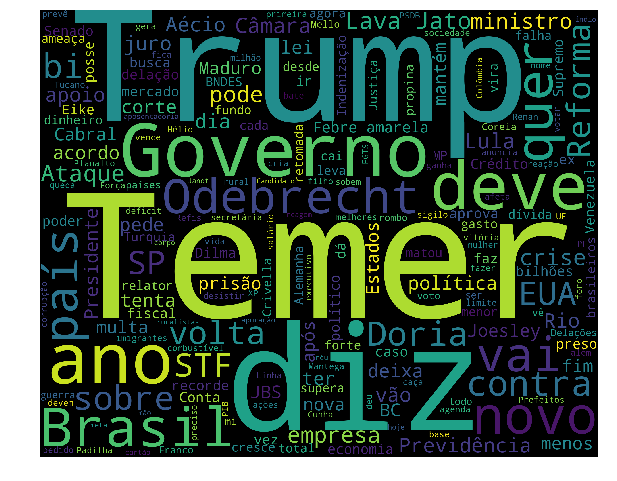

In [4]:
wordcloud_draw(data_limpa)

Através do wordcloud pode-se notas as palavras que mais aparecem nas manchetes, ou seja, as notícias dos jornais sõa baseados em políticas, trajédias e economia brasileira. É importante notar que no wordcloud foi utilizado o stopwords do nltk, mas para treinar o algoritmo, foi utilizado todas as palavras das manchetes, inclusive as preprosições e artigos.

## Treinamento

Como dito anteriormente, para analisar as valências das manchetes, esse projeto foi baseado em aprendizado de máquina supervisionado. A base de treinamento foi composta por 15 manchetes que foram escolhidas aleatórias e rotuladas -100 a 100 sendo negativo mais pŕoximo de -100, positivo mais próximo de 100 e neutro o mais próximo de 0. 

In [5]:
#Não utilizamos o préprocessamento que elimina as stopwords
dataset = pd.read_csv('manchete_10.csv', encoding='utf-8')
dataset

,texto,rotulo,classificacao
0,Chefe do Bradesco vê reação mais forte do Bras...,70,positivo
1,BC cria novo instrumento de política monetária,80,positivo
2,MP vai exigir regras de segurança para alegorias,98,positivo
3,Tatuapé comemora um título inédito,95,positivo
4,Saque do FGTS não terá limite,100,positivo
5,Philips quer administrar hospitais públicos no...,10,neutro
6,Fachin poderá ir para turma que julga Lava-Jato,-10,neutro
7,MP busca o apoio de ruralistas,-2,neutro
8,Governo poupa mas não pode gastar,0,neutro
9,Temer vai ao limite,-20,neutro


In [6]:
texto = dataset['texto'].values
print (texto)

#classes = dataset['classificação'].values
#print (classes)
#classes = np.array((70, 80, 98, 95, 100, 87, 75, 96, 82, 88, 2, 10, -10, -2, 0, -20, -2, 6, -5, 0, -95, -70, -84, -92, -100, -60, -88, -93, -74, -81))
classes = np.array((70, 80, 98, 95, 100, 10, -10, -2, 0, -20, -95, -70, -84, -92, -100))
classes
#classes = np.array(('positivo', 'positivo', 'positivo', 'positivo', 'positivo', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'neutro', 'negativo', 'negativo', 'negativo', 'negativo', 'negativo'))
#classes

['Chefe do Bradesco vê reação mais forte do Brasil em 2018'
 'BC cria novo instrumento de política monetária'
 'MP vai exigir regras de segurança para alegorias'
 'Tatuapé comemora um título inédito' 'Saque do FGTS não terá limite'
 'Philips quer administrar hospitais públicos no Brasil'
 'Fachin poderá ir para turma que julga Lava-Jato'
 'MP busca o apoio de ruralistas' 'Governo poupa mas não pode gastar'
 'Temer vai ao limite' 'Atendimento a baleados dispara em hospital do Rio'
 'Operador pagou decoração de luxo de imóveis de Cabral'
 'Falta de combustível derrubou avião diz Colômbia'
 'PIB cai pelo sétimo trimestre seguido projeções pioram'
 'Rotina precária nos hospitais universitários do interior de SP']


array([  70,   80,   98,   95,  100,   10,  -10,   -2,    0,  -20,  -95,
        -70,  -84,  -92, -100])

As características das manchetes são extraídas baseadas em n-grams e Bag-of-Words. Ou seja, as características são extraídas de acordo com a frequência das palavras e com a junção de 2 palavras. No algoritmo foi utilizado a biblioteca sklearn, mas poderia também ter utilizado a NLTK. 

Nesse algoritmo utilizamos o classificador de Naive Bayes, o qual é uma ferramenta estatística que calcula a probabilidade de um dado evento acontecer. Segue abaixo a equação, em que x representa uma determinada manchete.

<a href="https://www.codecogs.com/eqnedit.php?latex=P(positivo|x)&space;=&space;P(x|positivo)&space;\frac&space;{P(positivo)}{P(x)}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?P(positivo|x)&space;=&space;P(x|positivo)&space;\frac&space;{P(positivo)}{P(x)}" title="P(positivo|x) = P(x|positivo) \frac {P(positivo)}{P(x)}" /></a>


<a href="https://www.codecogs.com/eqnedit.php?latex=P(negativo|x)&space;=&space;P(x|negativo)&space;\frac&space;{P(negativo)}{P(x)}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?P(negativo|x)&space;=&space;P(x|negativo)&space;\frac&space;{P(negativo)}{P(x)}" title="P(negativo|x) = P(x|negativo) \frac {P(negativo)}{P(x)}" /></a>

In [7]:
#vectorizer = CountVectorizer(analyzer="word")
vectorizer = CountVectorizer(ngram_range=(1,2)) #extrai as características baseados em bow e n-grams(1,2)
freq_texto = vectorizer.fit_transform(texto) #transforma em valores as características
modelo = MultinomialNB() 
train_class = modelo.fit(freq_texto, classes)
#print (freq_texto)
print (train_class)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


## Classificação

Para testar o algoritmo utilizamos todas as manchetes.

In [8]:
testes = pd.read_csv('manchete_limpa.csv', encoding='utf-8')
#testes = ['testes','Drama do desemprego está longe de diminuir', 'BC prevê queda da inflação a 3%', 'Boicote atrasa governo Trump.', 'Crivella negocia Vila dos Atletas.', 'Crise amplia diferença de salário entre CLT e servidor.', 'Governo faz cortes após déficit recorde de R$ 155.7 bilhões.', 'Vitória é dada como certa no Senado e PMDB mira comissão.', 'Operador diz que repatriou propina de Eike a Cabral.', 'Doria quer punir pichadores com multa pesada e trabalho de gari.', 'Pedro Parente: Brasil não deveria ter desapreço ao capital estrangeiro.']
texto_testes = testes['teste'].values
#print (texto_testes)
freq_testes = vectorizer.transform(texto_testes)
#print (freq_testes)

Abaixo são apresentados os resultados de todas as manchetes, sendo mais próximo de -100 negativo, 100 positivo e 0 neutro.

In [9]:
result = modelo.predict(freq_testes)
print (result)

[ -70   80 -100  -70   70   10  -95  -10  -10  -70 -100   80    0 -100
  -70  -70   10  -70  -70  -20   98   98   70  -10 -100 -100  -70   98
 -100    0   70    0 -100 -100  -70 -100   98  -70  -70   98   10  -95
   70  -70   70 -100   80  -70   98   95  -70 -100   98  -84   10   95
 -100  -20   70 -100  -95  -70  -84 -100   -2  -20   70 -100  -70  -95
  -70  -95   80 -100  -92  -70  -84 -100  -70  -70   80  -95 -100   70
  -70   80  -95 -100  100  -70   70 -100  -70  100  -95   70   70  -84
   10  -84   70   -2  -10  -84  -70  -10    0 -100  -84  -92 -100   10
 -100  -70 -100   98  -20   10   10 -100   70  -70  -70   70 -100  -95
 -100  -95  -84   70  -95  -70 -100   95 -100 -100   98   10  -95   70
   98 -100  -10  -70 -100    0  -70  -70 -100  -70  -10 -100  -20  -70
 -100 -100 -100   70    0  -70  -70 -100  -70  -70 -100 -100   10  -70
 -100 -100  -20   70   -2    0  -20 -100 -100  -70  -20   70  -70   70
   -2 -100 -100  -70 -100 -100 -100   98   70 -100  -70  -70  -70 -100
  -70 

Segue abaixo cada manchete com os seus respectivos valores de valência. Pode se observar que o algoritmo identificou as valências como esperada, por exemplo: 'Atentado mata 90 pessoas em Cabul' é muito negativo, 'Agronegócio volta a investir para produzir safra recorde' é muito positivo ou 'Trump fala mas não convence' é muito neutro. Entretanto, houve também alguns resultados que não são esperado, como por exemplo: 'XP quer ser líder em cinco anos' mostrou um resultado muito negativo, mas é uma notícia positiva.

In [10]:
lista_dupla = []

for i, j in zip(result, texto_testes):
    lista_dupla.append([i,j])

for item in lista_dupla:
    print (item)

[-70, 'BNDES encolhe e volta ao nível de 20 anos atrás']
[80, 'BC cria novo instrumento de política monetária.']
[-100, 'Câmbio gera bate-boca entre UA e UE.']
[-70, 'Indenização a transmissoras de energia já chega à tarifa.']
[70, 'Políticos esperam que relator separe joio do trigo.']
[10, 'Philips quer administrar hospitais públicos no Brasil.']
[-95, 'Com vendas em queda C muda lojas e troca diretoria.']
[-10, 'Fachin poderá ir para turma que julga Lava-Jato.']
[-10, 'Eike tem multas que superam fundo para prisões.']
[-70, 'Operador pagou decoração de luxo de imóveis de Cabral.']
[-100, 'Drama do desemprego está longe de diminuir.']
[80, 'BC prevê queda da inflação a 3%.']
[0, 'Boicote atrasa governo Trump.']
[-100, 'Crivella negocia Vila dos Atletas.']
[-70, 'Crise amplia diferença de salário entre CLT e servidor.']
[-70, 'Governo faz cortes após déficit recorde de R$ 155.7 bilhões.']
[10, 'Vitória é dada como certa no Senado e PMDB mira comissão.']
[-70, 'Operador diz que repatrio

## Valência das manchetes separados pelos jornais

In [11]:
def classifica(test):
    texto_testes = test['teste'].values
    freq_testes = vectorizer.transform(texto_testes)
    result = modelo.predict(freq_testes)

    return np.average(result)

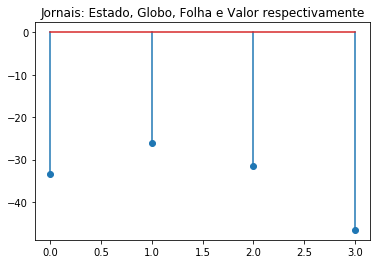

In [12]:
teste_estado = pd.read_csv('manchete_estado.csv', encoding='utf-8')
teste_globo = pd.read_csv('manchete_globo.csv', encoding='utf-8')
teste_folha = pd.read_csv('manchete_folha.csv', encoding='utf-8')
teste_valor = pd.read_csv('manchete_valor.csv', encoding='utf-8')

x_e = classifica(teste_estado)
x_g = classifica(teste_globo)
x_f = classifica(teste_folha)
x_v = classifica(teste_valor)

plt.stem([x_e, x_g, x_f, x_v])
plt.title('Jornais: Estado, Globo, Folha e Valor respectivamente')
plt.show()

As manchetes são consideradas frases impactantes para chamar a atenção do leitor, devido a isso podem ser consideradas negativas. Além disso, nosso país não está nas melhores condições econômicas e sociais. Observando o gráfico podemos observar que o jornal Valor é o mais negativo de todos, entretanto pode ocorrer de ter apenas apresentado notícias negativas sobre o país.

## Conclusão

Analisar valência ou sentimento do texto pode ser muito subjetivo, algumas pessoas podem determinar valências diferentes para determinadas manchetes. Entretanto, acredito que para determinadas frases que relacionam o bem comum da sociedade podem ser julgadas da mesma maneira pelas pessoas. 

No resultado apresentado, não achei correto calcular as métricas e encontrar o que o algoritmo acertou ou errou, pois isso é muito subjetivo e pessoal. Alguns resultados para mim eram esperados outros não, mas em geral apresentou resultados satisfatórios analisando as manchetes manualmente.

